In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm




In [2]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_11780\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



In [5]:
def choose_color(city):
    if city == 'London':
        return 'red'
    elif city == 'Belfast' or city == 'Birmingham':
        return 'orange'
    else:
        return 'green'


C:\Users\Boomw\AppData\Local\Temp\ipykernel_11780\217254784.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


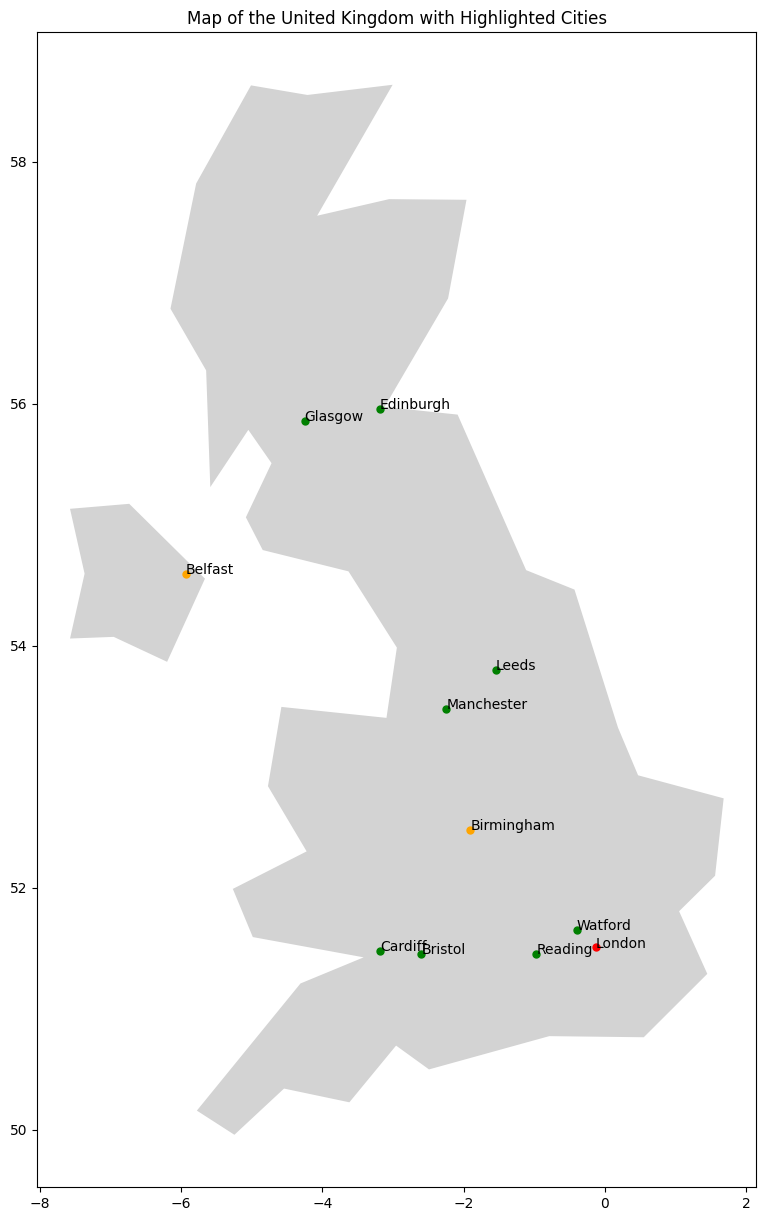

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color=choose_color(city), markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [7]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [8]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

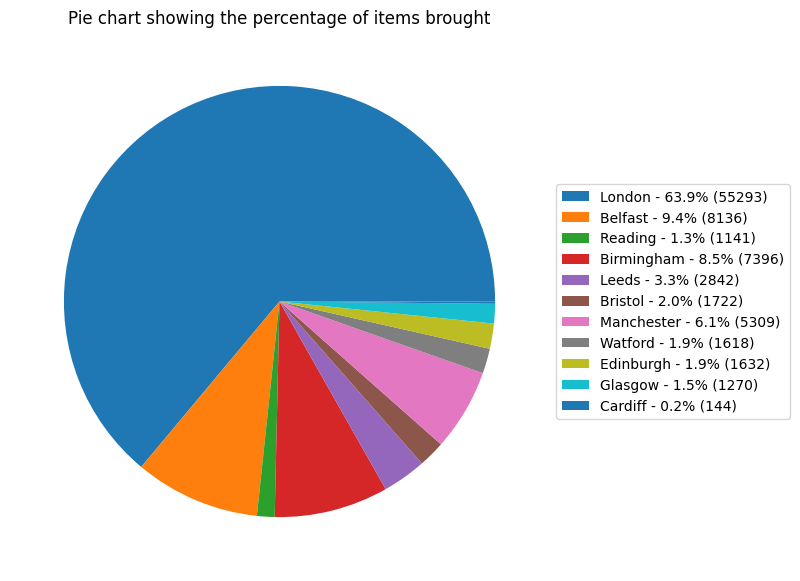

In [9]:

# Calculate the percentage for each city
percentages = [100. * amount / sum(len_of_city_array) for amount in len_of_city_array]

# Creating the pie chart without displaying percentages on the chart itself
plt.figure(figsize=(14, 7))
wedges, texts = plt.pie(len_of_city_array)

# Create custom labels for the legend, combining city names with their respective percentages and values
legend_labels = [f'{city} - {percentage:.1f}% ({value})' for city, percentage, value in zip(cities, percentages, len_of_city_array)]

# Adding the legend with custom labels
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie chart showing the percentage of items brought')
plt.show()


In [10]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [11]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [12]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [13]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [14]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [15]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

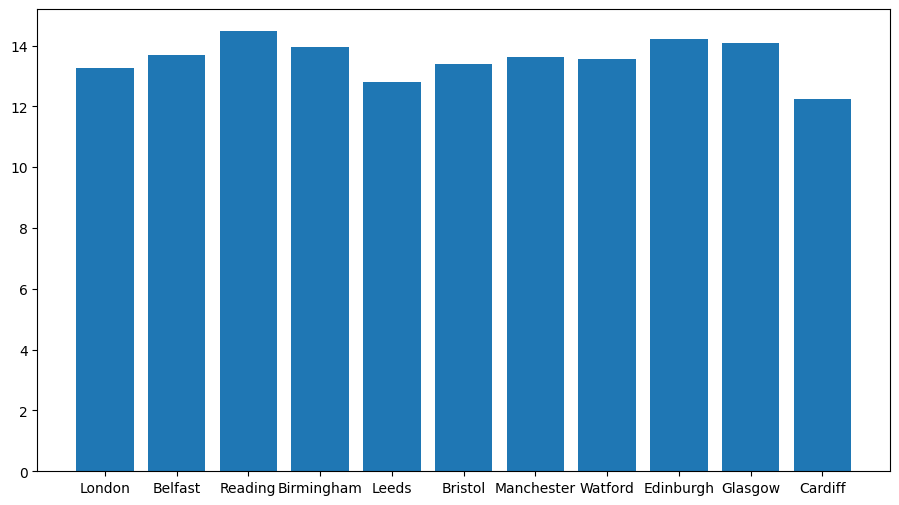

In [16]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [17]:
df_machine = df['Machine']
unique_machine = df_machine.unique()

In [18]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]


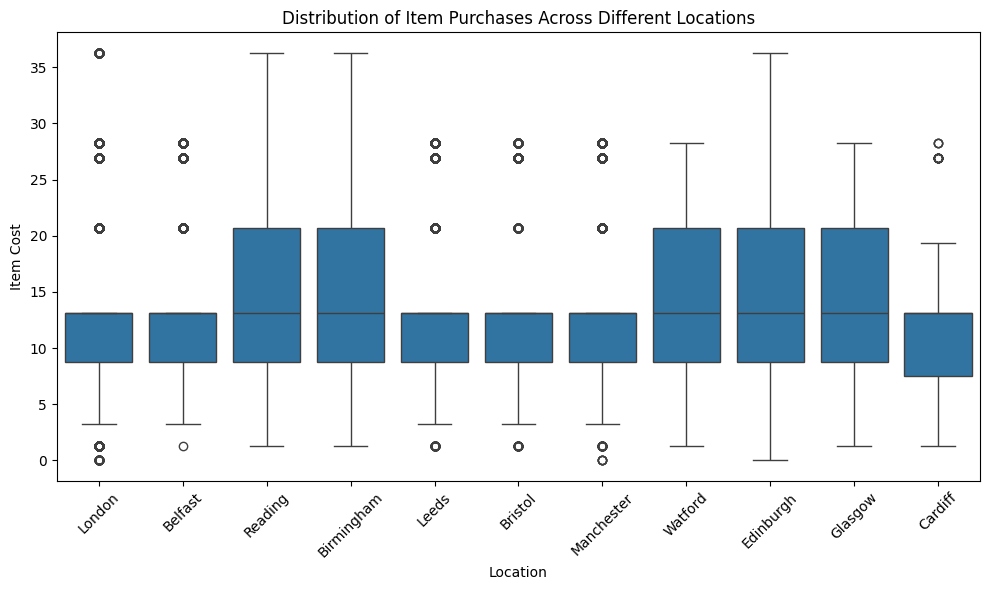

In [19]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [20]:
np.average(london['Cost'])

13.263668457128391

Doing the sairma model

In [21]:
import pandas as pd

def items_per_week(df):
    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert the dates to weekly periods
    df['Week_Period'] = df['Date'].dt.to_period('W')

    # Now you can group by 'Week_Period'
    weekly_groups = df.groupby('Week_Period')

    # Perform some operations within each group, for example, counting the rows per week
    weekly_counts = weekly_groups.size().reset_index(name='Counts')

    # Convert the 'Week_Period' to the start date of each week
    weekly_counts['Week_Start_Date'] = weekly_counts['Week_Period'].dt.start_time

    # If you want 'Week_Start_Date' to be the first column
    weekly_counts = weekly_counts[['Week_Start_Date', 'Counts']]

    return weekly_counts


In [22]:
items_per_week = items_per_week(df)
items_per_week = items_per_week.drop(items_per_week.index[0])


In [23]:
type(items_per_week['Week_Start_Date'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp

In [24]:
def get_fuller(location):
    adf_result = adfuller(location.groupby('Day').size())

    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))


In [25]:
def draw_time_graph(df):
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Week_Start_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


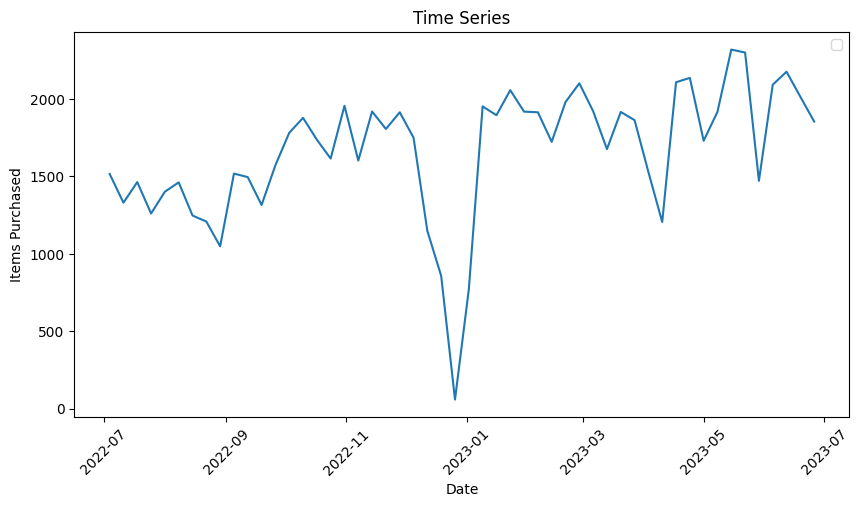

In [26]:
draw_time_graph(items_per_week)

In [27]:
def adfuller_test(items_purchased):
    result=adfuller(items_purchased)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [28]:
adfuller_test(items_per_week['Counts'])

ADF Test Statistic : -3.3677788609695374
p-value : 0.012107573899842575
#Lags Used : 0
Number of Observations Used : 51
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [29]:
def plot_acf_pacf(seasonal_difference , no_of_na):
    fig = plt.figure(figsize=(12,8))

    nlags = min(40, len(seasonal_difference.iloc[(no_of_na+1):]) // 2 - 1)

    # Assuming 'df' is your DataFrame and 'Seasonal First Difference' is a column in your DataFrame
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax1)

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax2)

    plt.show()


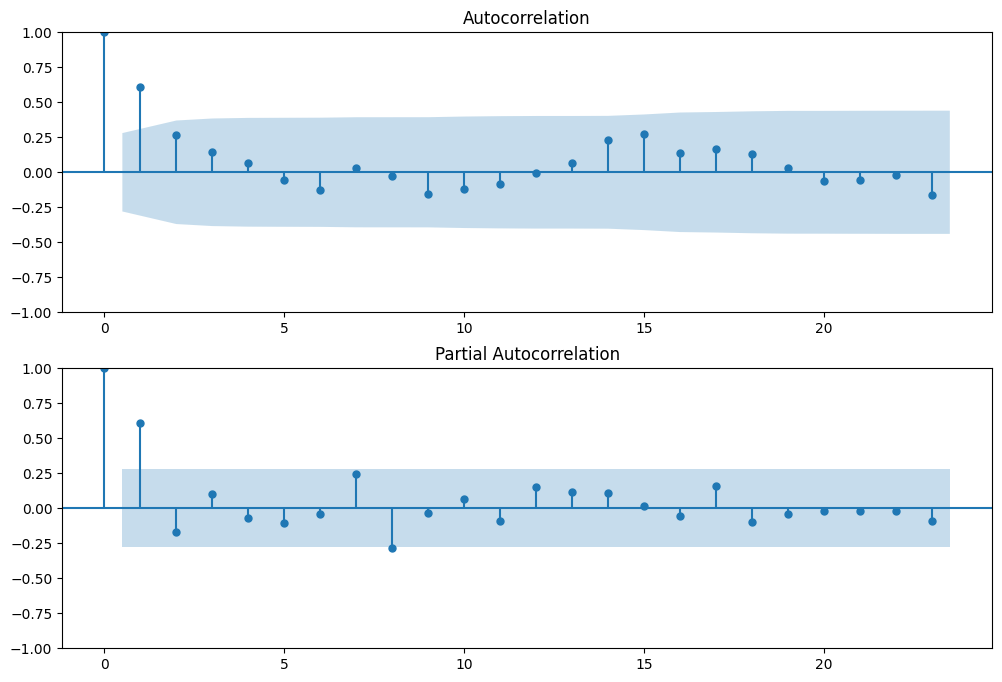

In [30]:
plot_acf_pacf(items_per_week['Counts'] , 2)

In [31]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [32]:
stepwise_fit = auto_arima(items_per_week['Counts']
                          ,trace = True , suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=750.750, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=752.499, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=752.123, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=748.767, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.417 seconds


In [43]:
train = items_per_week.iloc[:-10]
test = items_per_week.iloc[-10:]
print(train.shape , test.shape)

(42, 2) (10, 2)


In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is your DataFrame and it contains a column named 'Counts'
model = ARIMA(train['Counts'], order=(0, 1, 0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Counts   No. Observations:                   42
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -299.581
Date:                Mon, 08 Apr 2024   AIC                            601.163
Time:                        11:55:16   BIC                            602.876
Sample:                             0   HQIC                           601.787
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        1.3e+05   1.99e+04      6.520      0.000    9.09e+04    1.69e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.98
Prob(Q):                              0.99   Pr

In [45]:
start = len(train)
end = len(train) + len(test) -1
pred=results.predict(start = start , end = end, typ = 'levels')
pred.index = items_per_week['Week_Start_Date'][start:end+1]
print(pred)

Week_Start_Date
2023-04-24    2108.0
2023-05-01    2108.0
2023-05-08    2108.0
2023-05-15    2108.0
2023-05-22    2108.0
2023-05-29    2108.0
2023-06-05    2108.0
2023-06-12    2108.0
2023-06-19    2108.0
2023-06-26    2108.0
Name: predicted_mean, dtype: float64


In [33]:
import statsmodels.api as sm

p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 10# This should be set according to your data's seasonality

# Fit a SARIMA model
model = sm.tsa.statespace.SARIMAX(items_per_week['Counts'],
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, s),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

# You can now print out the summary of the model
print(results.summary())

# To make future predictions:
n_periods = 2  # For example, predict for 52 periods ahead
forecast = results.get_forecast(steps=n_periods)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

print(forecast_df)


                                     SARIMAX Results                                      
Dep. Variable:                             Counts   No. Observations:                   52
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -219.697
Date:                            Mon, 08 Apr 2024   AIC                            449.394
Time:                                    11:47:28   BIC                            456.230
Sample:                                         0   HQIC                           451.535
                                             - 52                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5209      0.164      3.168      0.002       0.199       0.843
ma.L1         -1.0001     53.598   

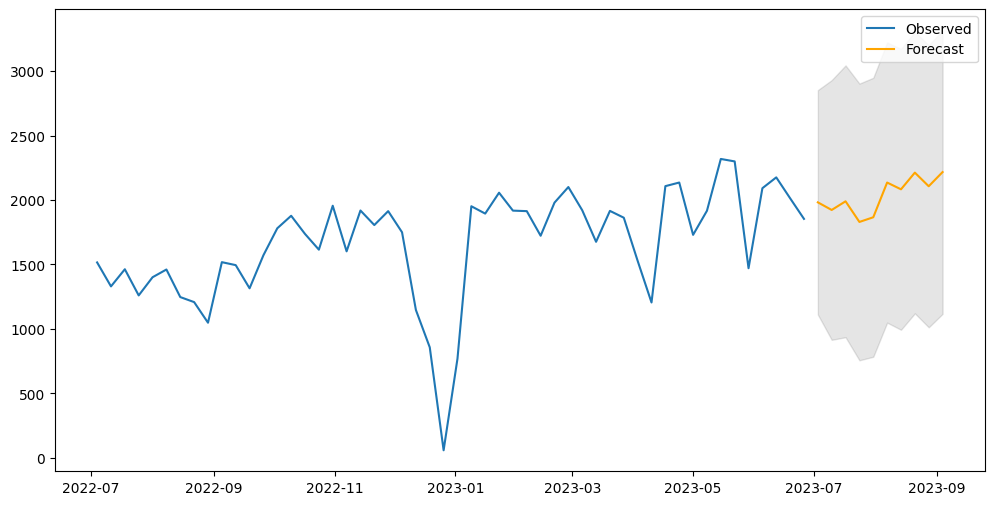

In [34]:
model_fit = model.fit()

# Correct the last known date by removing extra characters and convert to datetime
last_known_date = '2023-06-26'  # Removed the tab character
last_known_date = pd.to_datetime(last_known_date)

# Calculate the start date for the forecast as the next Monday after last_known_date
start_date = last_known_date + pd.DateOffset(days=(7 - last_known_date.weekday()))

# Now we create the date range for the forecast
forecast_date_range = pd.date_range(start=start_date, periods=10, freq='W-MON')

# Out-of-sample forecasts
forecast = model_fit.get_forecast(steps=10)  # Replace 10 with the number of future periods to forecast
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_date_range
forecast_predicted_mean = forecast.predicted_mean
forecast_predicted_mean.index = forecast_date_range

# Plotting the observed and forecasted values
plt.figure(figsize=(12, 6))

# Plot the observed values
plt.plot(items_per_week['Week_Start_Date'], items_per_week['Counts'], label='Observed')

# Plot the forecasted values
plt.plot(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

plt.legend()
plt.show()